## Lab 1 Termodinámica y Teoría Cinética 🧑‍🔬

- Camila Ferrus
- Marcelo Ojeda

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit

### IMPORTANTE

Es posible que en la medición de la expansión del acero, el medidor haya dado una vuelta completa y no lo hayamos medido.
Puede ser 98 * 0.01 en vez de 8 * 0.01

In [4]:
resistencia_str = '{} ± {} kOhm'

largo_Cu_amb = 70
kOhm_ambiente_cobre = [112.5, 112.2, 112.1, 112.0, 113.1, 113.4, 112.4, 111.9, 113.1, 113.0]
kOhm_amb_Cu_mean = round(np.median(kOhm_ambiente_cobre), 1)
kOhm_amb_Cu_std = round(np.std(kOhm_ambiente_cobre, ddof=1), 2)

kOhm_agua_cobre = [7.50, 7.46, 7.44, 7.41, 7.40, 7.36, 7.35, 7.36, 7.35, 7.35, 7.36, 7.36]
kOhm_agua_Cu_mean = round(np.median(kOhm_agua_cobre), 1)
kOhm_agua_Cu_std = round(np.std(kOhm_agua_cobre), 2)
expansion_Cu = 76 * 0.01

largo_acero_amb = 70
kOhm_ambiente_acero = [103.7, 103.8, 103.9, 104.0, 104.8, 105.0, 105.1, 105.2, 
                       105.3, 105.4, 105.6, 105.7, 105.8, 105.8, 106.1, 106.3, 
                       108.5, 108.6, 109.5, 109.7, 109.8]
kOhm_amb_ac_mean = round(np.median(kOhm_ambiente_acero), 1)
kOhm_amb_ac_std = round(np.std(kOhm_ambiente_acero, ddof=1), 2)

kOhm_agua_acero = [9.26, 9.25, 9.22, 9.21, 9.20, 9.19, 9.19, 9.19, 9.18, 9.16,
                  9.14, 9.10, 9.04, 9.03, 9.01, 8.99, 8.98, 9.0, 9.07, 9.07, 9.07, 9.08]
kOhm_agua_ac_mean = round(np.median(kOhm_agua_acero), 2)
kOhm_agua_ac_std = round(np.std(kOhm_agua_acero, ddof=1), 2)
expansion_acero = 5 * 0.01

largo_aluminio_amb = 70
kOhm_ambiente_aluminio = [106.3, 106.4, 106.5, 106.5, 106.6, 106.6, 106.7, 106.8, 106.9,
                          108.0, 108.1, 108.3, 108.3, 108.3, 108.3, 108.4, 108.5, 108.5,
                          110.2, 110.3, 110.3, 110.4, 110.4, 110.5, 110.5, 110.5, 110.6,
                          111.9, 111.9, 111.9, 112.0, 112.0, 112.1, 112.1, 112.1, 112.2]
kOhm_amb_Al_mean = round(np.median(kOhm_ambiente_aluminio), 1)
kOhm_amb_Al_std = round(np.std(kOhm_ambiente_aluminio, ddof=1), 2)

kOhm_agua_aluminio = [7.72, 7.71, 7.71, 7.70, 7.70, 7.69, 7.69, 7.68, 7.67, 7.67,
                      7.65, 7.58, 7.59, 7.59, 7.59, 7.59, 7.58, 7.58, 7.59, 7.58,
                      7.58, 7.59, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58,
                      7.58, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58, 7.58]
kOhm_agua_Al_mean = round(np.median(kOhm_agua_aluminio), 2)
kOhm_agua_Al_std = round(np.std(kOhm_agua_aluminio, ddof=1), 2)
expansion_aluminio = 123 * 0.01

err_medidor = 0.01 / 2
err_ohmetro = 0.1 / 2
err_huincha = 0.1 / 2
err_ohmetro_m = 0.01 / 2

print(f'Largo del tubo de cobre a temperatura ambiente: {largo_Cu_amb} cm')
print('Resistencia del tubo de cobre a temperatura ambiente: {}'.
      format(resistencia_str.format(kOhm_amb_Cu_mean, kOhm_amb_Cu_std)))
print('Resistencia del tubo de cobre con agua caliente: {}'.
      format(resistencia_str.format(kOhm_agua_Cu_mean, kOhm_agua_Cu_std)))
print(f'Expansión del tubo de cobre: {expansion_Cu} mm')
print('')

print(f'Largo del tubo de acero a temperatura ambiente: {largo_acero_amb} cm')
print('Resistencia del tubo de acero a temperatura ambiente: {}'.
      format(resistencia_str.format(kOhm_amb_ac_mean, kOhm_amb_ac_std)))
print('Resistencia del tubo de acero con agua caliente: {}'.
      format(resistencia_str.format(kOhm_agua_ac_mean, kOhm_agua_ac_std)))
print(f'Expansión del tubo de acero: {expansion_acero} mm')
print('')

print(f'Largo del tubo de aluminio a temperatura ambiente: {largo_aluminio_amb} cm')
print('Resistencia del tubo de aluminio a temperatura ambiente: {}'.
      format(resistencia_str.format(kOhm_amb_Al_mean, kOhm_amb_Al_std)))
print('Resistencia del tubo de aluminio con agua caliente: {}'.
      format(resistencia_str.format(kOhm_agua_Al_mean, kOhm_agua_Al_std)))
print(f'Expansión del tubo de aluminio: {expansion_aluminio} mm')
print('')

print(f'Error asociado al medidor: {err_medidor} mm')
print(f'Error asociado al Ohmetro: {err_ohmetro} kOhm')
print(f'Error asociado al Ohmetro para valores menores que 100 kOhm: {err_ohmetro_m} kOhm')
print(f'Error asociado a la huincha: {err_huincha} cm')

Largo del tubo de cobre a temperatura ambiente: 70 cm
Resistencia del tubo de cobre a temperatura ambiente: 112.4 ± 0.54 kOhm
Resistencia del tubo de cobre con agua caliente: 7.4 ± 0.05 kOhm
Expansión del tubo de cobre: 0.76 mm

Largo del tubo de acero a temperatura ambiente: 70 cm
Resistencia del tubo de acero a temperatura ambiente: 105.6 ± 1.96 kOhm
Resistencia del tubo de acero con agua caliente: 9.12 ± 0.09 kOhm
Expansión del tubo de acero: 0.05 mm

Largo del tubo de aluminio a temperatura ambiente: 70 cm
Resistencia del tubo de aluminio a temperatura ambiente: 109.4 ± 2.1 kOhm
Resistencia del tubo de aluminio con agua caliente: 7.58 ± 0.05 kOhm
Expansión del tubo de aluminio: 1.23 mm

Error asociado al medidor: 0.005 mm
Error asociado al Ohmetro: 0.05 kOhm
Error asociado al Ohmetro para valores menores que 100 kOhm: 0.005 kOhm
Error asociado a la huincha: 0.05 cm


## Resistencia eléctrica contra Temperatura

In [5]:
data = 'tabla_resistencias.txt' 
datos = pd.read_csv(data)
datos['Temperatura (K)'] = [temp_celsius + 273.15 for temp_celsius in datos['Temperatura (°C)']]
datos

,Resistencia (kOhm),Temperatura (°C),Temperatura (K)
0,351.0200,0,273.15
1,332.6400,1,274.15
2,315.3200,2,275.15
3,298.9900,3,276.15
4,283.6000,4,277.15
...,...,...,...
96,6.3308,96,369.15
97,6.1298,97,370.15
98,5.9361,98,371.15
99,5.7493,99,372.15


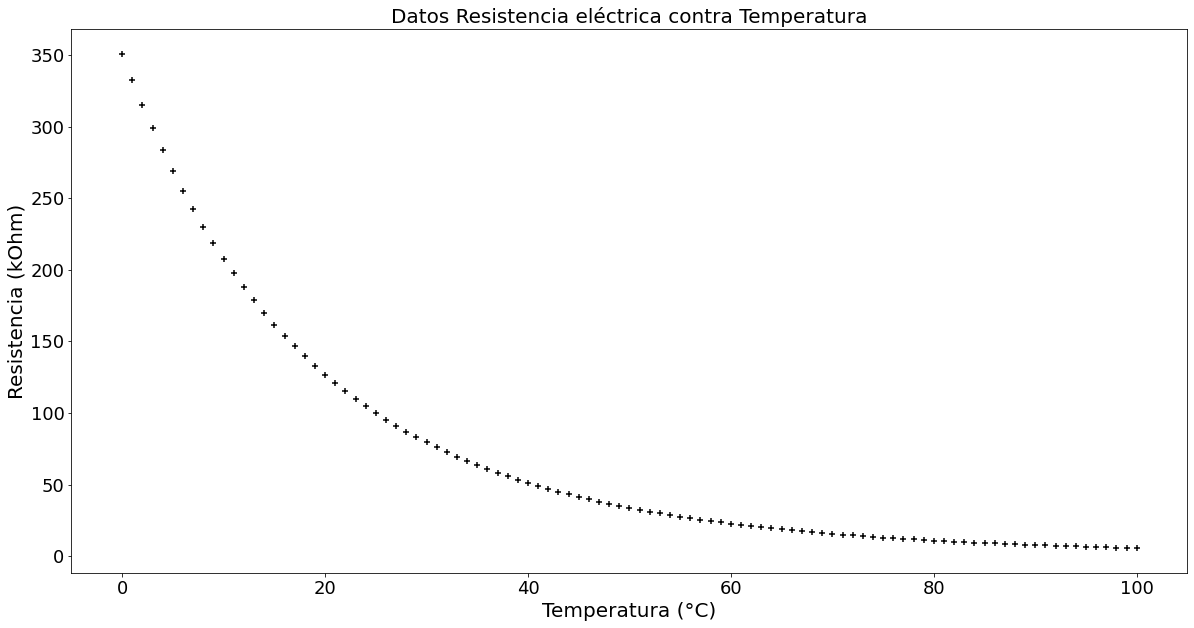

In [31]:
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax1.set_title("Datos Resistencia eléctrica contra Temperatura", fontsize=20)
ax1.set_xlabel("Temperatura (°C)", fontsize=20)
ax1.set_ylabel("Resistencia (kOhm)", fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)


## Ajuste Resistencia eléctrica contra Temperatura

In [63]:
def modelo(R, B, A, c):
    return B / (np.log(R/A)) + c

In [64]:
popt, pcov = curve_fit(modelo, datos['Resistencia (kOhm)'], datos['Temperatura (°C)'])
popt

c:\Users\56974\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 5.77324472e+03,  7.37284035e-06, -3.26545658e+02])

In [67]:
def modelo_aj(R):
    return popt[0] / (np.log(R/popt[1])) + popt[2]

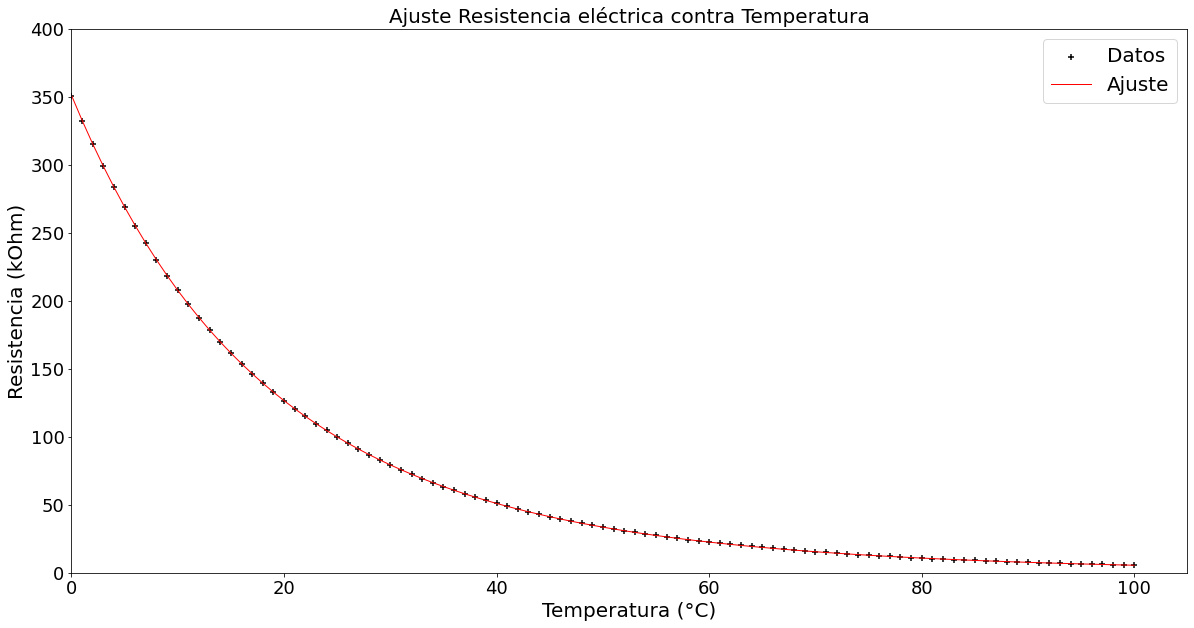

In [68]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black', label='Datos')

ax1.plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red', label='Ajuste')

ax1.set_title("Ajuste Resistencia eléctrica contra Temperatura", fontsize=20)
ax1.set_xlabel("Temperatura (°C)", fontsize=20)
ax1.set_ylabel("Resistencia (kOhm)", fontsize=20)

ax1.set_xlim(0, 105)
ax1.set_ylim(0, 400)

ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

ax1.legend(fontsize=20)

## Cambio de temperatura para el cobre

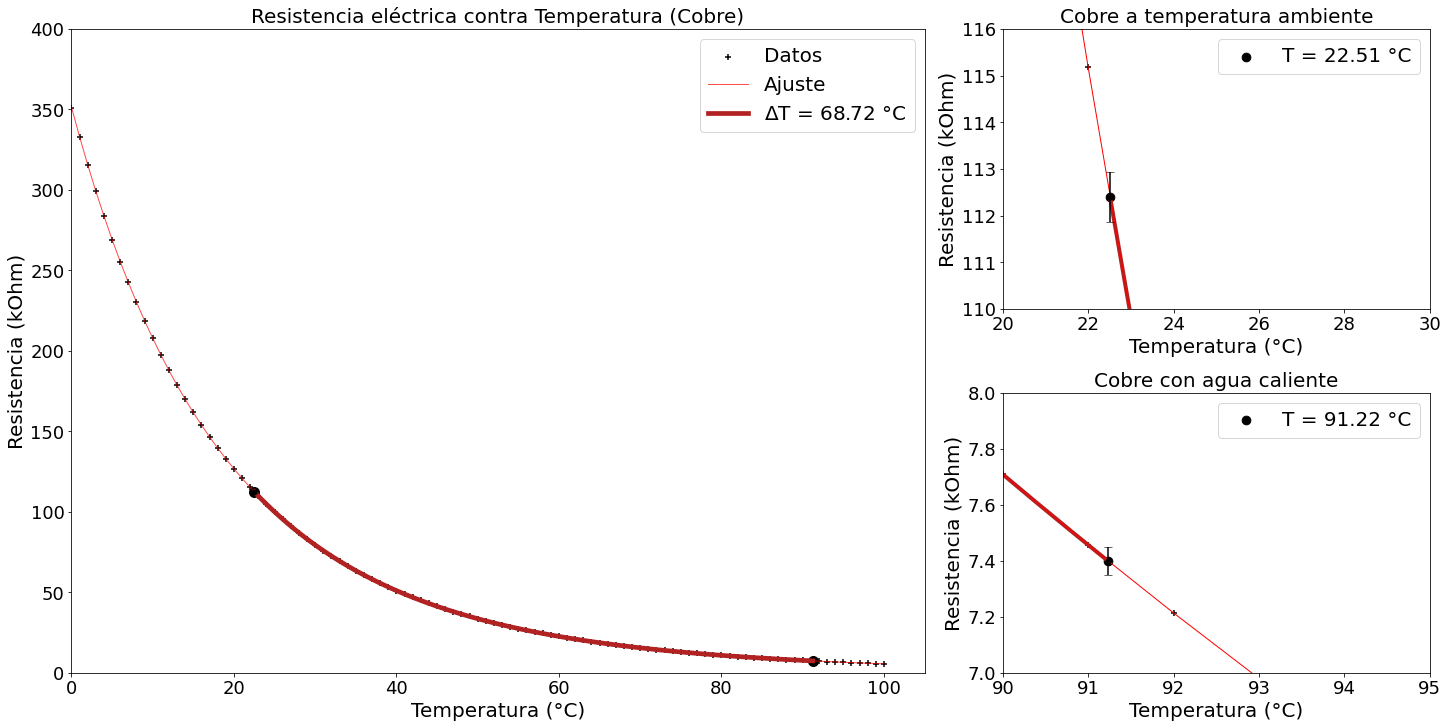

In [42]:
curva_dtemp = np.linspace(kOhm_agua_Cu_mean, kOhm_amb_Cu_mean, 1000)

fig = plt.figure(constrained_layout=True, figsize=(20,10))
ax = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})



ax['Left'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black', label='Datos')
ax['Left'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red', label='Ajuste', alpha=0.7)

ax['Left'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4.7, color='firebrick', 
                label=fr'$\Delta$T = {round(modelo_aj(kOhm_agua_Cu_mean) - modelo_aj(kOhm_amb_Cu_mean), 2)} °C', alpha=1)

ax['Left'].scatter(modelo_aj(kOhm_amb_Cu_mean), kOhm_amb_Cu_mean, marker='.', color='Black', s=400)
ax['Left'].errorbar(modelo_aj(kOhm_amb_Cu_mean), kOhm_amb_Cu_mean, yerr=kOhm_amb_Cu_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['Left'].scatter(modelo_aj(kOhm_agua_Cu_mean), kOhm_agua_Cu_mean, marker='.', color='Black', s=400)

ax['Left'].set_xlim(0, 105)
ax['Left'].set_ylim(0, 400)

ax['Left'].set_title("Resistencia eléctrica contra Temperatura (Cobre)", fontsize=20)
ax['Left'].set_xlabel("Temperatura (°C)", fontsize=20)
ax['Left'].set_ylabel("Resistencia (kOhm)", fontsize=20)

ax['Left'].legend(fontsize=20)
ax['Left'].tick_params(axis='x', labelsize=18)
ax['Left'].tick_params(axis='y', labelsize=18)

ax['TopRight'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4, color='firebrick')
ax['TopRight'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax['TopRight'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red')

ax['TopRight'].scatter(modelo_aj(kOhm_amb_Cu_mean), kOhm_amb_Cu_mean, marker='.', color='Black', s=300, 
                      label = f'T = {round(modelo_aj(kOhm_amb_Cu_mean), 2)} °C')
ax['TopRight'].errorbar(modelo_aj(kOhm_amb_Cu_mean), kOhm_amb_Cu_mean, yerr=kOhm_amb_Cu_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['TopRight'].set_title("Cobre a temperatura ambiente", fontsize=20)
ax['TopRight'].set_xlabel("Temperatura (°C)", fontsize=20)
ax['TopRight'].set_ylabel("Resistencia (kOhm)", fontsize=20)

ax['TopRight'].set_xlim(20, 30)
ax['TopRight'].set_ylim(110, 116)

ax['TopRight'].legend(fontsize=20)
ax['TopRight'].tick_params(axis='x', labelsize=18)
ax['TopRight'].tick_params(axis='y', labelsize=18)

ax['BottomRight'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4, color='firebrick')
ax['BottomRight'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax['BottomRight'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red')

ax['BottomRight'].scatter(modelo_aj(kOhm_agua_Cu_mean), kOhm_agua_Cu_mean, marker='.', color='Black', s=300, 
                      label = f'T = {round(modelo_aj(kOhm_agua_Cu_mean), 2)} °C')
ax['BottomRight'].errorbar(modelo_aj(kOhm_agua_Cu_mean), kOhm_agua_Cu_mean, yerr=kOhm_agua_Cu_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['BottomRight'].set_title("Cobre con agua caliente", fontsize=20)
ax['BottomRight'].set_xlabel("Temperatura (°C)", fontsize=20)
ax['BottomRight'].set_ylabel("Resistencia (kOhm)", fontsize=20)

ax['BottomRight'].set_xlim(90, 95)
ax['BottomRight'].set_ylim(7, 8)

ax['BottomRight'].legend(fontsize=20)
ax['BottomRight'].tick_params(axis='x', labelsize=18)
ax['BottomRight'].tick_params(axis='y', labelsize=18)



## Cambio de temperatura para el acero

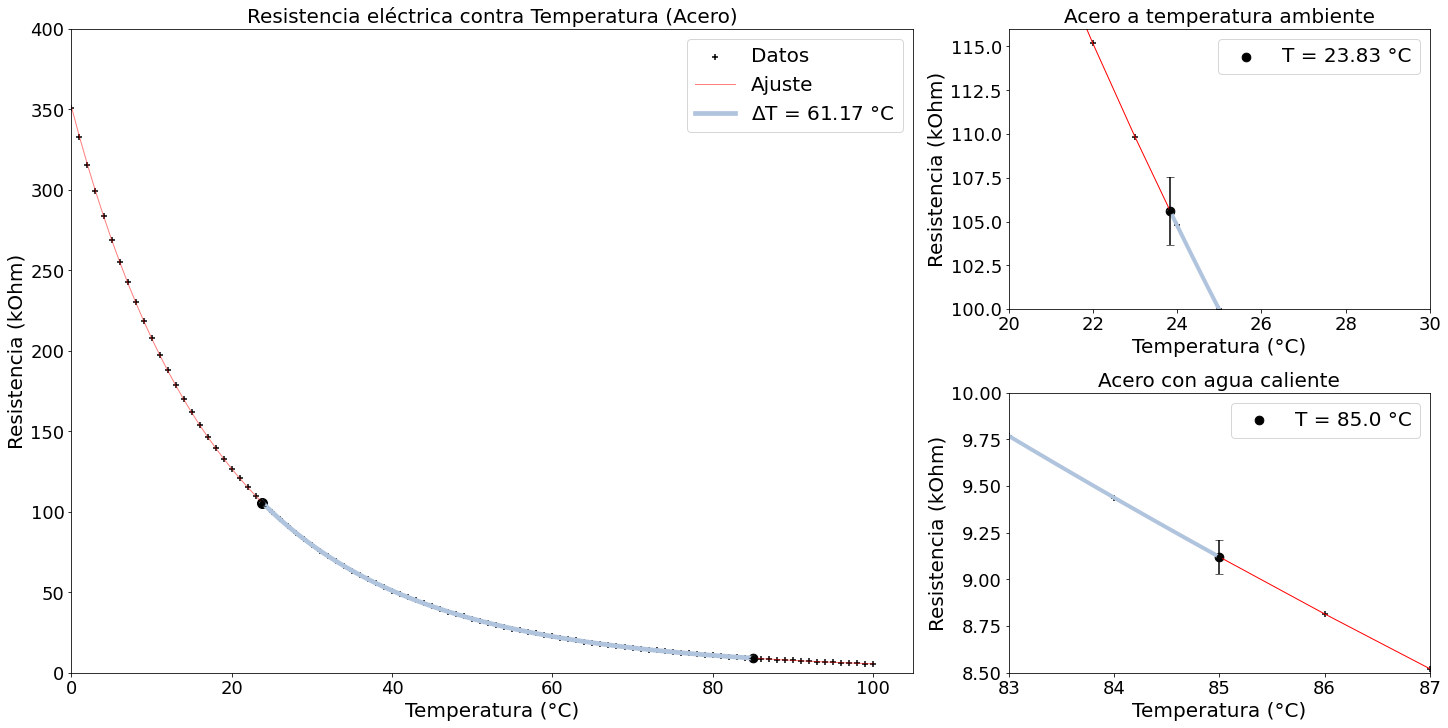

In [45]:
curva_dtemp = np.linspace(kOhm_agua_ac_mean, kOhm_amb_ac_mean, 1000)

fig = plt.figure(constrained_layout=True, figsize=(20,10))
ax = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})

ax['Left'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black', label='Datos')
ax['Left'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red', label='Ajuste', alpha=0.5)

ax['Left'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4.7, color='lightsteelblue', 
                label=fr'$\Delta$T = {round(modelo_aj(kOhm_agua_ac_mean) - modelo_aj(kOhm_amb_ac_mean), 2)} °C', alpha=1)

ax['Left'].scatter(modelo_aj(kOhm_amb_ac_mean), kOhm_amb_ac_mean, marker='.', color='Black', s=400)
ax['Left'].errorbar(modelo_aj(kOhm_amb_ac_mean), kOhm_amb_ac_mean, yerr=kOhm_amb_ac_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['Left'].scatter(modelo_aj(kOhm_agua_ac_mean), kOhm_agua_ac_mean, marker='.', color='Black', s=300)
ax['Left'].errorbar(modelo_aj(kOhm_agua_ac_mean), kOhm_agua_ac_mean, yerr=kOhm_agua_ac_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['Left'].set_title("Resistencia eléctrica contra Temperatura (Acero)", fontsize=20)
ax['Left'].set_xlabel("Temperatura (°C)", fontsize=20)
ax['Left'].set_ylabel("Resistencia (kOhm)", fontsize=20)

ax['Left'].set_xlim(0, 105)
ax['Left'].set_ylim(0, 400)

ax['Left'].legend(fontsize=20)
ax['Left'].tick_params(axis='x', labelsize=18)
ax['Left'].tick_params(axis='y', labelsize=18)

ax['TopRight'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax['TopRight'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red')
ax['TopRight'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4, color='lightsteelblue')


ax['TopRight'].scatter(modelo_aj(kOhm_amb_ac_mean), kOhm_amb_ac_mean, marker='.', color='Black', s=300, 
                      label = f'T = {round(modelo_aj(kOhm_amb_ac_mean), 2)} °C')
ax['TopRight'].errorbar(modelo_aj(kOhm_amb_ac_mean), kOhm_amb_ac_mean, yerr=kOhm_amb_ac_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['TopRight'].set_title("Acero a temperatura ambiente", fontsize=20)
ax['TopRight'].set_xlabel("Temperatura (°C)",fontsize=20)
ax['TopRight'].set_ylabel("Resistencia (kOhm)",fontsize=20)

ax['TopRight'].set_xlim(20, 30)
ax['TopRight'].set_ylim(100, 116)

ax['TopRight'].legend(fontsize=20)
ax['TopRight'].tick_params(axis='x', labelsize=18)
ax['TopRight'].tick_params(axis='y', labelsize=18)

ax['BottomRight'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax['BottomRight'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red')
ax['BottomRight'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4, color='lightsteelblue')

ax['BottomRight'].scatter(modelo_aj(kOhm_agua_ac_mean), kOhm_agua_ac_mean, marker='.', color='Black', s=300, 
                      label = f'T = {round(modelo_aj(kOhm_agua_ac_mean), 2)} °C')
ax['BottomRight'].errorbar(modelo_aj(kOhm_agua_ac_mean), kOhm_agua_ac_mean, yerr=kOhm_agua_ac_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['BottomRight'].set_title("Acero con agua caliente", fontsize=20)
ax['BottomRight'].set_xlabel("Temperatura (°C)", fontsize=20)
ax['BottomRight'].set_ylabel("Resistencia (kOhm)", fontsize=20)

ax['BottomRight'].set_xlim(83, 87)
ax['BottomRight'].set_ylim(8.5, 10)

ax['BottomRight'].legend(fontsize=20)
ax['BottomRight'].tick_params(axis='x', labelsize=18)
ax['BottomRight'].tick_params(axis='y', labelsize=18)

## Cambio de temperatura para Aluminio

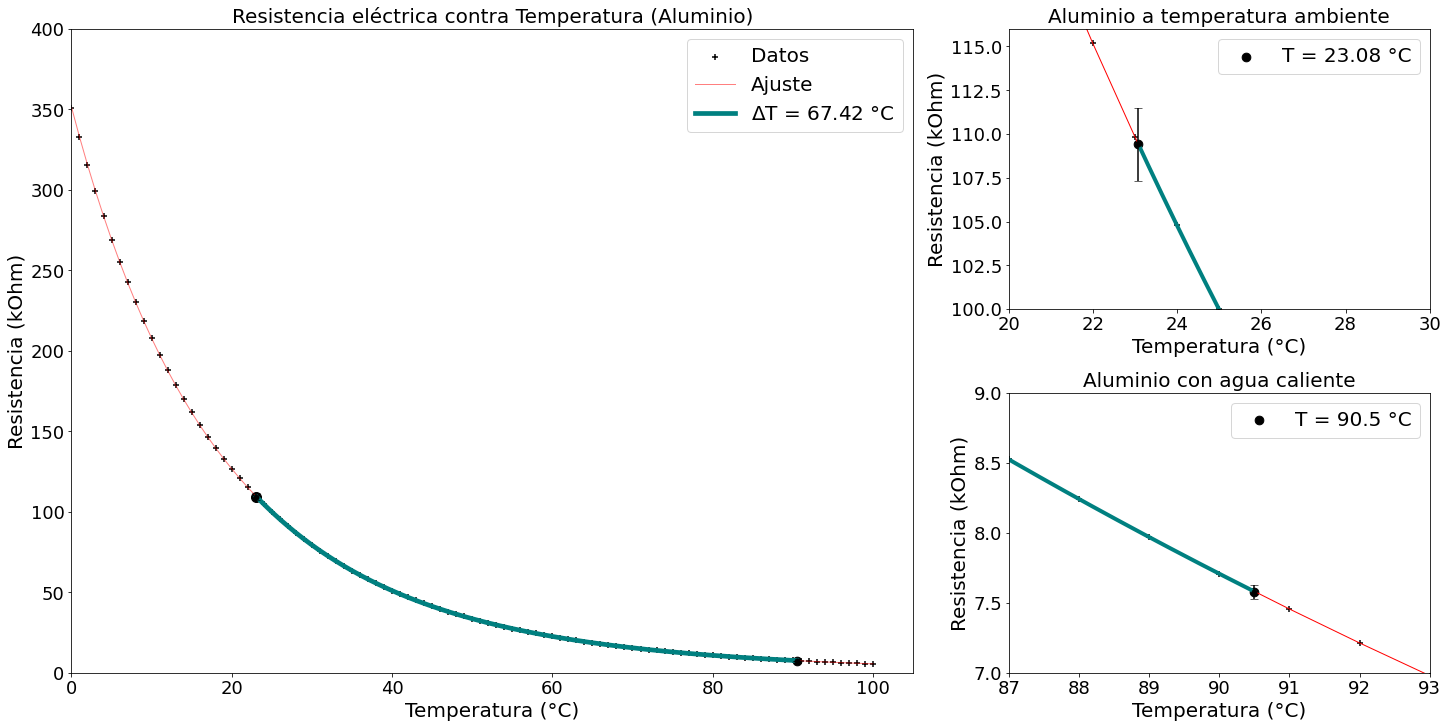

In [46]:
curva_dtemp = np.linspace(kOhm_agua_Al_mean, kOhm_amb_Al_mean, 1000)

fig = plt.figure(constrained_layout=True, figsize=(20,10))
ax = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})

ax['Left'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black', label='Datos')
ax['Left'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red', label='Ajuste', alpha=0.5)

ax['Left'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4.7, color='teal', 
                label=fr'$\Delta$T = {round(modelo_aj(kOhm_agua_Al_mean) - modelo_aj(kOhm_amb_Al_mean), 2)} °C', alpha=1)

ax['Left'].scatter(modelo_aj(kOhm_amb_Al_mean), kOhm_amb_Al_mean, marker='.', color='Black', s=400)
ax['Left'].errorbar(modelo_aj(kOhm_amb_Al_mean), kOhm_amb_Al_mean, yerr=kOhm_amb_Al_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['Left'].scatter(modelo_aj(kOhm_agua_Al_mean), kOhm_agua_Al_mean, marker='.', color='Black', s=300)
ax['Left'].errorbar(modelo_aj(kOhm_agua_Al_mean), kOhm_agua_Al_mean, yerr=kOhm_agua_Al_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['Left'].set_title("Resistencia eléctrica contra Temperatura (Aluminio)", fontsize=20)
ax['Left'].set_xlabel("Temperatura (°C)",fontsize=20)
ax['Left'].set_ylabel("Resistencia (kOhm)",fontsize=20)

ax['Left'].set_xlim(0, 105)
ax['Left'].set_ylim(0, 400)

ax['Left'].legend(fontsize=20)
ax['Left'].tick_params(axis='x', labelsize=18)
ax['Left'].tick_params(axis='y', labelsize=18)

ax['TopRight'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax['TopRight'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red')
ax['TopRight'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4, color='teal')


ax['TopRight'].scatter(modelo_aj(kOhm_amb_Al_mean), kOhm_amb_Al_mean, marker='.', color='Black', s=300, 
                      label = f'T = {round(modelo_aj(kOhm_amb_Al_mean), 2)} °C')
ax['TopRight'].errorbar(modelo_aj(kOhm_amb_Al_mean), kOhm_amb_Al_mean, yerr=kOhm_amb_Al_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['TopRight'].set_title("Aluminio a temperatura ambiente",fontsize=20)
ax['TopRight'].set_xlabel("Temperatura (°C)",fontsize=20)
ax['TopRight'].set_ylabel("Resistencia (kOhm)",fontsize=20)

ax['TopRight'].set_xlim(20, 30)
ax['TopRight'].set_ylim(100, 116)

ax['TopRight'].legend(fontsize=20)
ax['TopRight'].tick_params(axis='x', labelsize=18)
ax['TopRight'].tick_params(axis='y', labelsize=18)

ax['BottomRight'].scatter(datos['Temperatura (°C)'], datos['Resistencia (kOhm)'], marker='+', color='black')
ax['BottomRight'].plot(modelo_aj(datos['Resistencia (kOhm)']), datos['Resistencia (kOhm)'], linewidth=1, color = 'Red')
ax['BottomRight'].plot(modelo_aj(curva_dtemp), curva_dtemp, linewidth=4, color='teal')

ax['BottomRight'].scatter(modelo_aj(kOhm_agua_Al_mean), kOhm_agua_Al_mean, marker='.', color='Black', s=300, 
                      label = f'T = {round(modelo_aj(kOhm_agua_Al_mean), 2)} °C')
ax['BottomRight'].errorbar(modelo_aj(kOhm_agua_Al_mean), kOhm_agua_Al_mean, yerr=kOhm_agua_Al_std, 
            fmt = '.', markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)

ax['BottomRight'].set_title("Aluminio con agua caliente",fontsize=20)
ax['BottomRight'].set_xlabel("Temperatura (°C)",fontsize=20)
ax['BottomRight'].set_ylabel("Resistencia (kOhm)",fontsize=20)

ax['BottomRight'].set_xlim(87, 93)
ax['BottomRight'].set_ylim(7, 9)

ax['BottomRight'].legend(fontsize=20)
ax['BottomRight'].tick_params(axis='x', labelsize=18)
ax['BottomRight'].tick_params(axis='y', labelsize=18)